In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme()
      
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Input data files from windows - import os for directory
# C:/Users/Fujitsu/Documents/Data Science_Manu/Projekte/Recognition_image/data_vehicle_recognition/ (=directory)

import os

In [4]:
#PREPARING FILENAMES:

for dirname,_, filenames in os.walk('./data_vehicle_recognition/'):
    for filename in filenames:
        os.path.join(dirname, filename)
        #print(os.path.join(dirname, filename))    

In [6]:
#PREPARING PATH:

root_dir = './data_vehicle_recognition/vehicles/'

In [5]:
# Reading images

import cv2

In [6]:
#PREPARING DATA, LABELS AND LABELNAMES IN LISTS

data = []
labels = []
labelnames = []

for label in os.listdir(root_dir):
    path = './data_vehicle_recognition/vehicles/{0}/'.format(label)
    folder_data = os.listdir(path)
    for image_path in folder_data:
        img = cv2.imread(path + image_path)
        img = cv2.resize(img, (32, 32))
        data.append(img)
        labels.append(label)
        if not label in labelnames:
            labelnames.append(label)

In [7]:
labelnames

['bike',
 'boat',
 'bus',
 'car',
 'cycle',
 'helicopter',
 'plane',
 'scooty',
 'truck']

In [8]:
#TRANSFORMING IN A NUMPY ARRAY:

data = np.array(data)
labels = np.array(labels)

In [9]:
data.shape, labels.shape

((526, 32, 32, 3), (526,))

In [10]:
type(data), type(labels)

(numpy.ndarray, numpy.ndarray)

In [11]:
# Encoding Label

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
labels = le.fit_transform(labels)

In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
#MAKE CATEGORIES:

labels = to_categorical(labels)

In [14]:
data.shape, labels.shape

((526, 32, 32, 3), (526, 9))

In [15]:
#SHUFFLE DATA AND LABELS:

new = np.arange(526)

In [16]:
np.random.shuffle(new)

In [17]:
data = data[new]
labels = labels[new]

# Convolutional Neural Network Model

In [18]:
#TRAIN TEST SPLIT:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=33)

In [33]:
# import librarys für layers and models

from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout, LeakyReLU
from tensorflow.keras.models import Sequential

In [20]:
#CREATING MODEL:
    
model = Sequential([
    Conv2D(32, (3, 3), padding="same", activation='relu', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    
    Conv2D(64, (3, 3), padding="same", activation=LeakyReLU(0.001)),
    Conv2D(64, (3, 3), activation=LeakyReLU(0.001)),
    MaxPool2D((2, 2)),
    
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(9, activation="softmax")])

In [21]:
#MODEL COMPLING:

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [47]:
#TRAINING WITH 100 EPOCHS:

history = model.fit(X_train, y_train, epochs=100, validation_split=0.25, batch_size=32)

Epoch 1/100
10/10 [==============================] - 1s 88ms/step - loss: 0.0628 - accuracy: 0.9810 - val_loss: 2.4831 - val_accuracy: 0.4857
Epoch 2/100
10/10 [==============================] - 1s 82ms/step - loss: 0.0596 - accuracy: 0.9778 - val_loss: 2.5602 - val_accuracy: 0.4762
Epoch 3/100
10/10 [==============================] - 1s 79ms/step - loss: 0.0736 - accuracy: 0.9714 - val_loss: 2.6926 - val_accuracy: 0.4952
Epoch 4/100
10/10 [==============================] - 1s 82ms/step - loss: 0.0590 - accuracy: 0.9841 - val_loss: 2.3158 - val_accuracy: 0.5143
Epoch 5/100
10/10 [==============================] - 1s 80ms/step - loss: 0.1392 - accuracy: 0.9714 - val_loss: 2.3562 - val_accuracy: 0.4286
Epoch 6/100
10/10 [==============================] - 1s 81ms/step - loss: 0.0781 - accuracy: 0.9619 - val_loss: 3.2171 - val_accuracy: 0.4857
Epoch 7/100
10/10 [==============================] - 1s 80ms/step - loss: 0.2025 - accuracy: 0.9460 - val_loss: 2.2109 - val_accuracy: 0.5333
Epoch 

In [48]:
#ACCURACY AND LOSS IN A DATAFRAME:

history_df = pd.DataFrame(history.history)
history_df.tail(5)

,loss,accuracy,val_loss,val_accuracy
95,0.042132,0.990476,3.070535,0.466667
96,0.036421,0.980952,3.119775,0.457143
97,0.059176,0.990476,3.069177,0.457143
98,0.016064,0.993651,3.328260,0.495238
99,0.044331,0.980952,2.922155,0.485714


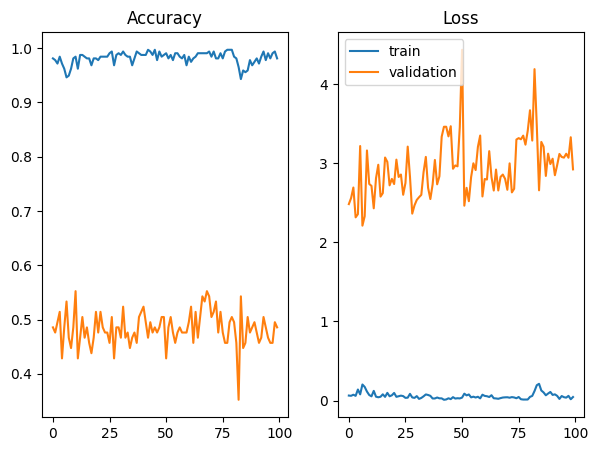

In [49]:
# Visualization Accuracy and Loss 

figure, axes = plt.subplots(1, 2, figsize=(7,5))

axes[0].plot(pd.DataFrame(history_df)[['accuracy','val_accuracy']])
axes[0].set_title("Accuracy")
axes[1].plot(pd.DataFrame(history_df)[['loss','val_loss']])
axes[1].set_title("Loss")
plt.legend(['train', 'validation'])
plt.show()

In [50]:
#ACCURACY:
    
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 23ms/step - loss: 2.6932 - accuracy: 0.6226


[2.693232297897339, 0.6226415038108826]

In [51]:
#PREDICTION:

y_pred = model.predict(X_test)
label_classes = y_pred.argmax(axis=-1)
label_classes

4/4 [==============================] - 0s 20ms/step


array([1, 6, 2, 3, 4, 6, 3, 0, 7, 4, 4, 4, 4, 1, 6, 8, 4, 1, 5, 8, 1, 2,
       7, 1, 1, 8, 8, 7, 5, 4, 5, 7, 3, 4, 0, 1, 2, 5, 8, 5, 5, 7, 0, 7,
       5, 7, 3, 6, 6, 2, 3, 4, 0, 8, 5, 0, 0, 5, 1, 4, 7, 4, 1, 5, 1, 4,
       0, 1, 2, 0, 5, 3, 7, 3, 3, 6, 3, 3, 5, 5, 5, 1, 7, 6, 2, 1, 3, 2,
       2, 2, 0, 1, 8, 8, 5, 4, 8, 4, 3, 7, 4, 5, 3, 0, 7, 7], dtype=int64)

In [52]:
#TRANSFORMING y_test:

liste_indizes = []

for i in y_test:
    a = 0
    for j in i:        
        if j == 1:
            liste_indizes.append(a)
        a += 1

In [53]:
#TRANSFORM IT IN AN ARRAY:

liste_indizes_arr = np.asarray(liste_indizes)
liste_indizes_arr

array([1, 6, 8, 3, 0, 1, 3, 0, 7, 4, 4, 0, 0, 8, 6, 0, 4, 1, 5, 8, 1, 8,
       7, 1, 8, 3, 8, 7, 1, 4, 1, 7, 8, 4, 3, 3, 0, 5, 3, 1, 5, 7, 0, 7,
       6, 0, 2, 3, 6, 2, 3, 7, 0, 8, 7, 0, 0, 5, 1, 4, 7, 4, 1, 5, 3, 4,
       0, 2, 2, 0, 1, 3, 3, 3, 5, 7, 3, 3, 5, 5, 1, 1, 7, 1, 2, 6, 3, 7,
       1, 6, 0, 1, 8, 8, 5, 5, 3, 4, 5, 8, 4, 5, 3, 0, 7, 7])

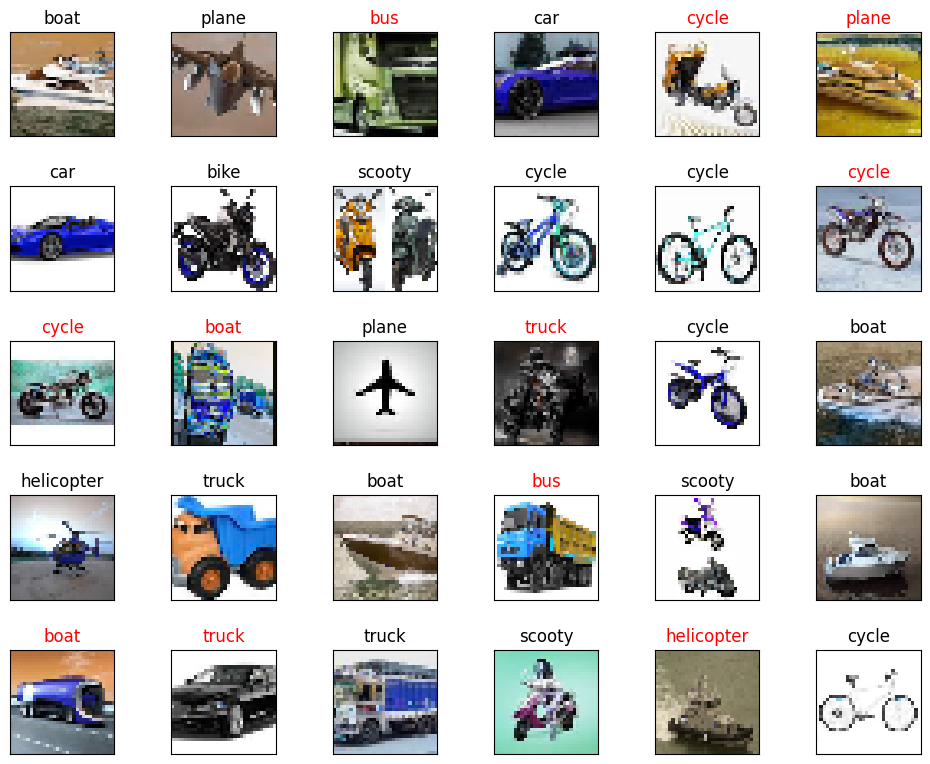

In [56]:
fig, ax = plt.subplots(5, 6, subplot_kw=dict(xticks=[], yticks=[]), figsize=(10,8))
for i, axi in enumerate(ax.flat):
    color = 'black'
    if label_classes[i]!=liste_indizes_arr[i]:
        color='r'
    axi.imshow(X_test[i], cmap='Blues_r')
    axi.set_title(labelnames[label_classes[i]], color=color)
fig.tight_layout(pad=2)
plt.show()